# 6.3 실습 - 인공신경망 학습
## 6.3.2 성능 개선

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import os

os.chdir('/content/drive/MyDrive/혼자하는_머신러닝_딥러닝/Chapter_07_딥러닝을_시작합니다')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.datasets import load_boston

# 데이터 불러오기
boston_df = pd.read_csv('/Users/Ahn/2023/MLDL/data/boston.csv')
# boston = load_boston()
# boston_df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
# boston_df['PRICE'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


In [3]:
boston_df.shape

(506, 15)

In [5]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 데이터분할
y = boston_df['MEDV']
X = boston_df.drop(['MEDV'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print('X_train.shape =', X_train.shape)
print('y_train.shape =', y_train.shape)

print('X_test.shape =' , X_test.shape)
print('y_test.shape =' , y_test.shape)

X_train.shape = (379, 14)
y_train.shape = (379,)
X_test.shape = (127, 14)
y_test.shape = (127,)


In [7]:
# 모델의 설정
model = Sequential()
model.add(Dense(16, input_dim=14, activation='relu'))
model.add(Dense(1, activation='relu'))

In [8]:
# 모델 컴파일
model.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mse'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                240       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


In [9]:
# 모델 실행
model.fit(X_train, y_train, epochs=50, batch_size=10)

Epoch 1/50
38/38 [==============================] - 0s 557us/step - loss: 332.1083 - mse: 332.1083
Epoch 2/50
38/38 [==============================] - 0s 538us/step - loss: 127.4439 - mse: 127.4439
Epoch 3/50
38/38 [==============================] - 0s 486us/step - loss: 94.2157 - mse: 94.2157
Epoch 4/50
38/38 [==============================] - 0s 444us/step - loss: 89.6050 - mse: 89.6050
Epoch 5/50
38/38 [==============================] - 0s 442us/step - loss: 82.0763 - mse: 82.0763
Epoch 6/50
38/38 [==============================] - 0s 443us/step - loss: 79.4323 - mse: 79.4323
Epoch 7/50
38/38 [==============================] - 0s 444us/step - loss: 75.8146 - mse: 75.8146
Epoch 8/50
38/38 [==============================] - 0s 441us/step - loss: 73.4934 - mse: 73.4934
Epoch 9/50
38/38 [==============================] - 0s 434us/step - loss: 69.9771 - mse: 69.9771
Epoch 10/50
38/38 [==============================] - 0s 453us/step - loss: 70.2357 - mse: 70.2357
Epoch 11/50
38/38 [======

In [10]:
y_pred = model.predict(X_test)
y_pred[0]

4/4 [==============================] - 0s 774us/step


array([28.390955], dtype=float32)

In [11]:
y_test[0]

24.0

In [12]:
y_test.shape

(127,)

In [13]:
y_pred = np.reshape(y_pred,(127,))

In [14]:
result = pd.DataFrame({'y': y_test.values, 
                       'y_pred': y_pred, 
                       'diff': np.abs(y_test.values - y_pred)})
result.sort_values(by=['diff'], ascending=False)

,y,y_pred,diff
111,27.5,7.642296,19.857704
96,50.0,30.629486,19.370514
97,17.9,0.000000,17.900000
99,17.2,0.000000,17.200000
27,14.9,0.000000,14.900000
...,...,...,...
101,21.4,21.515327,0.115327
119,23.7,23.644709,0.055291
87,25.0,24.946760,0.053240
58,23.9,23.938021,0.038021


In [15]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 40])
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

In [16]:
history = model.fit(X_train, y_train, epochs = 500, verbose=0, validation_split = 0.2)

In [17]:
history.history

{'loss': [37.701438903808594,
  36.94910430908203,
  36.92731475830078,
  37.43367004394531,
  36.742122650146484,
  36.577388763427734,
  36.41172790527344,
  36.601654052734375,
  37.14280319213867,
  37.540184020996094,
  36.33285140991211,
  36.4794921875,
  34.79703140258789,
  29.18117332458496,
  29.700008392333984,
  29.117151260375977,
  28.988677978515625,
  27.48594093322754,
  26.937068939208984,
  26.847110748291016,
  26.069499969482422,
  25.4010066986084,
  25.368471145629883,
  25.22532844543457,
  24.446744918823242,
  25.163711547851562,
  24.804302215576172,
  24.283761978149414,
  24.64621353149414,
  24.37890625,
  23.93027687072754,
  24.692434310913086,
  24.019636154174805,
  24.6870059967041,
  24.673200607299805,
  24.587980270385742,
  24.56263542175293,
  26.398418426513672,
  23.55068016052246,
  23.341686248779297,
  23.202392578125,
  23.175024032592773,
  24.276424407958984,
  23.899133682250977,
  23.502613067626953,
  22.82709312438965,
  25.132766723

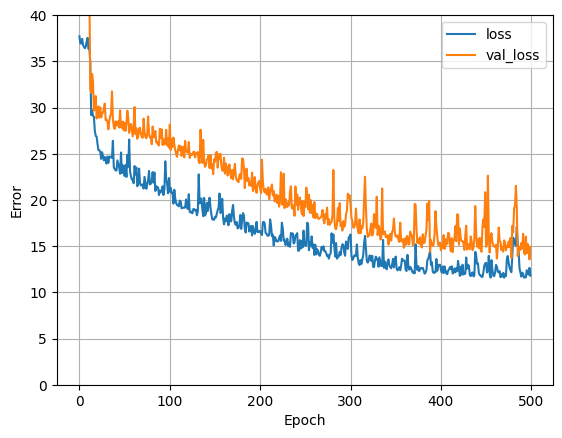

In [18]:
plot_loss(history)

In [19]:
from tensorflow.keras.layers.experimental import preprocessing

normalizer = preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))

normalized_model = Sequential()
normalized_model.add(normalizer)
normalized_model.add(Dense(16, activation='relu'))
normalized_model.add(Dense(1, activation='relu'))

normalized_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 14)               29        
 n)                                                              
                                                                 
 dense_4 (Dense)             (None, 16)                240       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 286
Trainable params: 257
Non-trainable params: 29
_________________________________________________________________


In [20]:
normalized_model.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mse'])

normalized_history = normalized_model.fit(X_train, y_train, epochs = 500, verbose=0, validation_split = 0.2)

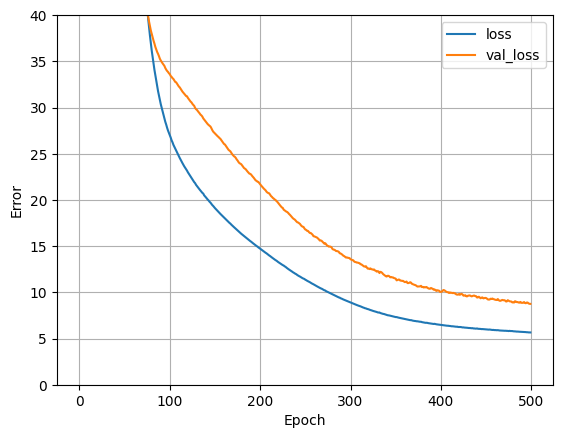

In [21]:
plot_loss(normalized_history)

4/4 [==============================] - 0s 832us/step


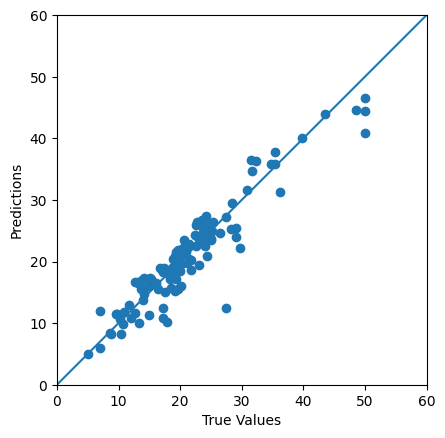

In [22]:
y_pred = normalized_model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 60]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [23]:
result = pd.DataFrame({'y': y_test.values, 'y_pred': y_pred, 'diff': y_test.values - y_pred, 'diff(abs)': np.abs(y_test.values - y_pred)})
result.sort_values(by=['diff(abs)'], ascending=False)

,y,y_pred,diff,diff(abs)
111,27.5,12.376941,15.123059,15.123059
96,50.0,40.836441,9.163559,9.163559
97,17.9,10.164426,7.735574,7.735574
15,29.8,22.209547,7.590453,7.590453
99,17.2,10.880194,6.319806,6.319806
...,...,...,...,...
90,23.2,23.070684,0.129316,0.129316
88,25.0,24.895012,0.104988,0.104988
14,18.5,18.395256,0.104744,0.104744
75,5.0,4.946319,0.053681,0.053681


<AxesSubplot: xlabel='diff', ylabel='Count'>

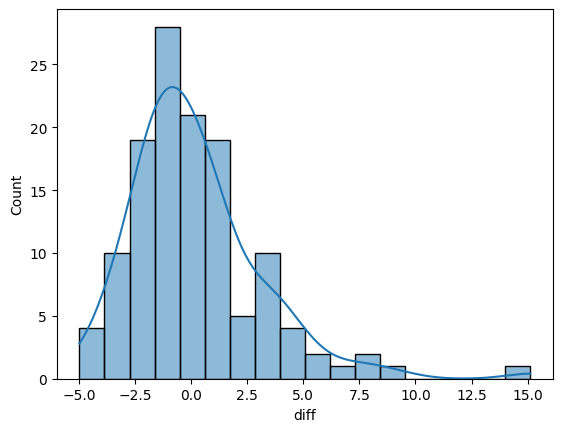

In [24]:
sns.histplot(data=result['diff'], kde = True)